In [1]:
import numpy as np
%run ../src/smearing_matrix.py

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-bp8j3omn because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#######################################################################
# Declare ROOT files for the Analysis
#######################################################################

mc_files=get_first_N_files("../projects/test/volatile/data/piplus_piminus/",1,"MC_RGA_*")
data_files=get_first_N_files("../projects/test_data/volatile/data/piplus_piminus/",1,"nSidis_RGA_*")

In [3]:
#######################################################################
# 2d Rectangular Binning
#######################################################################

rect_bin_factory = RectBinFactory()
#rect_bin_factory.make_bins("rec_z",np.array([0.3,0.38,0.5,0.6,0.7,0.9]))
#rect_bin_factory.make_bins("rec_pTtot",np.array([0,0.2,0.4,0.6,0.8,1,1.5]))
rect_bin_factory.make_bins("rec_phi_h",np.linspace(-3.1415,3.1415,30))

In [4]:
#######################################################################
# Custom Binning
#######################################################################

custom_bin_factory = CustomBinFactory(["rec_x","rec_Q2"])

# Add (x,Q2) boundaries
low_Q2 = "rec_Q2>1.4144 + -5.4708 * rec_x + 40.5357 * rec_x*rec_x + -40.0208 * rec_x*rec_x*rec_x + 29.2121 * rec_x*rec_x*rec_x*rec_x"
lmiddle_Q2="rec_Q2<0.6361935324019532 + 5.961630973508846*rec_x + 12.028695097029118*rec_x*rec_x"
hmiddle_Q2="rec_Q2>0.6361935324019532 + 5.961630973508846*rec_x + 12.028695097029118*rec_x*rec_x"
high_Q2 = "rec_Q2<rec_x*17"

custom_bin_factory.add_curve("low_Q2",low_Q2)
custom_bin_factory.add_curve("lmiddle_Q2",lmiddle_Q2)
custom_bin_factory.add_curve("hmiddle_Q2",hmiddle_Q2)
custom_bin_factory.add_curve("high_Q2",high_Q2)

custom_bin_factory.make_bin(["low_Q2","high_Q2"],"rec_x>0.07","rec_x<0.12")
custom_bin_factory.make_bin(["hmiddle_Q2","high_Q2"],"rec_x>0.12","rec_x<0.15")
custom_bin_factory.make_bin(["low_Q2","lmiddle_Q2"],"rec_x>0.12","rec_x<0.2")
custom_bin_factory.make_bin(["hmiddle_Q2","high_Q2"],"rec_x>0.15","rec_x<0.22")
custom_bin_factory.make_bin(["low_Q2","lmiddle_Q2"],"rec_x>0.2","rec_x<0.275")
custom_bin_factory.make_bin(["hmiddle_Q2","high_Q2"],"rec_x>0.22","rec_x<0.29")
custom_bin_factory.make_bin(["low_Q2","lmiddle_Q2"],"rec_x>0.275","rec_x<0.42")
custom_bin_factory.make_bin(["hmiddle_Q2","high_Q2"],"rec_x>0.29","rec_x<0.42")
custom_bin_factory.make_bin(["low_Q2","high_Q2"],"rec_x>0.42","rec_x<1")

In [5]:
#######################################################################
# Load all Binnings into the BinManager
#######################################################################

bin_manager = BinManager()
bin_manager.load_factory(rect_bin_factory)
bin_manager.load_factory(custom_bin_factory)

In [6]:
#######################################################################
# Create and run smearing matrix
#######################################################################

smearing_matrix = SmearingMatrix(mc_files, bin_manager)

smearing_matrix.run()

100%|████████████████████████████████████████████| 1/1 [00:19<00:00, 19.90s/it]


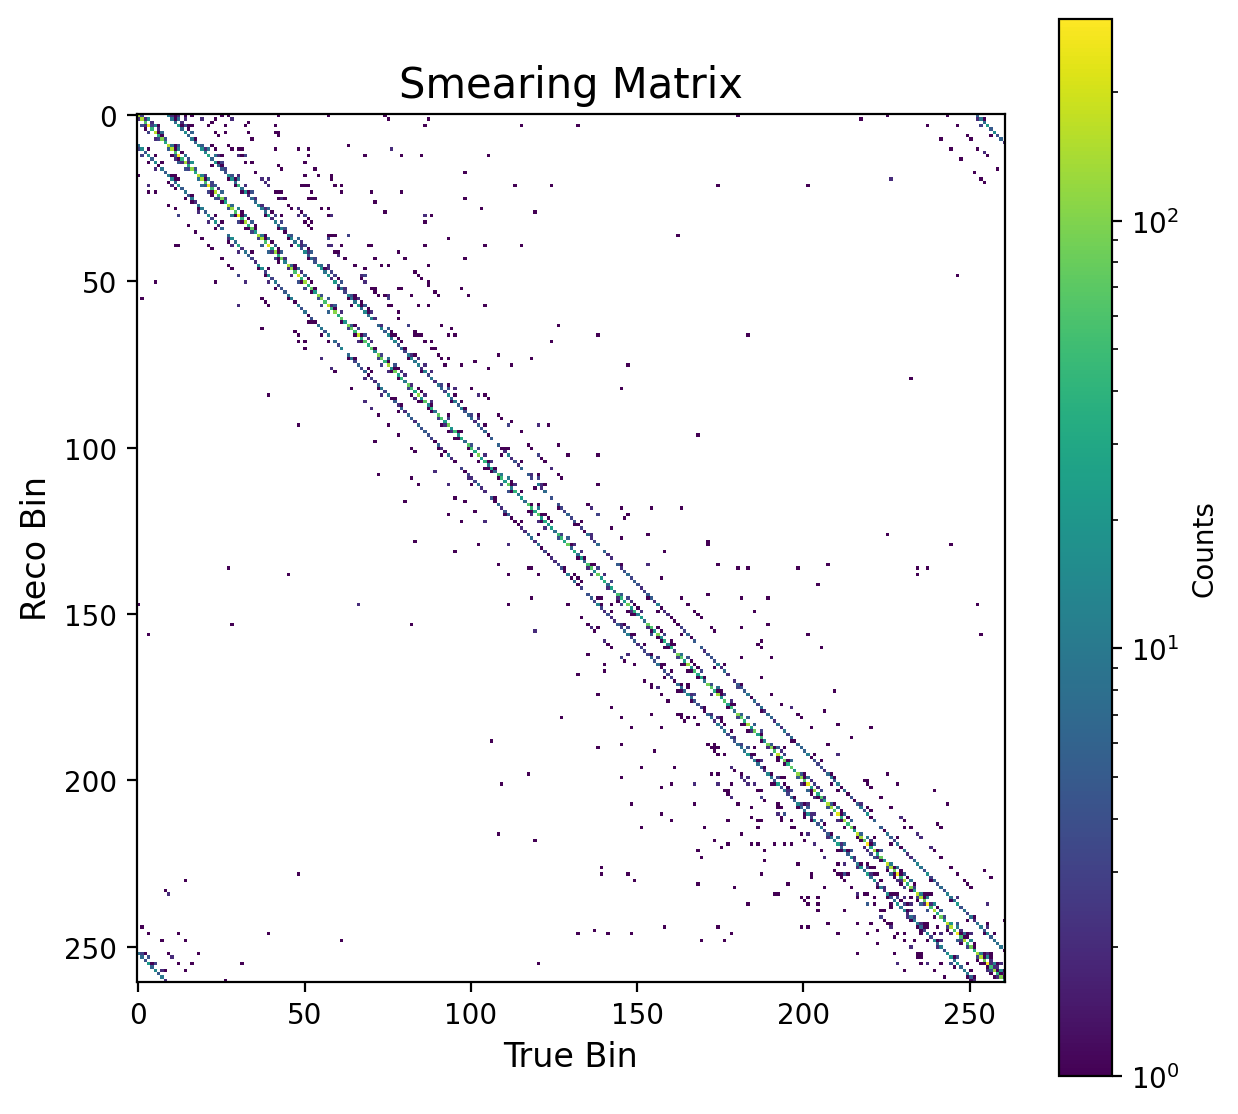

In [7]:
smearing_matrix.draw_smearing_matrix(do_log_scale=True,
                                     show_overflow=False)

In [29]:
#######################################################################
# Reading the unique bin id for a given data set
#######################################################################

x, Q2, z, pT = 0.135, 1.4, 0.55, 0.3
values = {"rec_x": np.array([x]) , "rec_Q2": np.array([Q2]),
          "rec_z": np.array([z]) , "rec_pTtot": np.array([pT])}

bin_manager.print_bins_from_values(values)

KeyError: 'rec_phi_h'

In [30]:
#######################################################################
# Perform unfolding
#######################################################################
%run ../src/unfold.py
ROOT.gStyle.SetOptStat(0)

In [31]:
usable_bins = smearing_matrix.bin_manager.total_bins - 1 # We do not unfold overflow/underflow bins
true_bins = smearing_matrix.true_bins
reco_bins = smearing_matrix.reco_bins
dataloader = DataLoader(bin_manager)
data = dataloader.read_binned_data_from_data_file(data_files)
data_bins = bin_manager.get_bin_ids(*data)

100%|████████████████████████████████████████████| 5/5 [00:00<00:00,  7.69it/s]


In [42]:
reco_hist,true_hist,data_hist,unfolded_hist = Unfold.perform_RooUnfold(usable_bins,true_bins,reco_bins,data_bins,"bayes")

An additional truth bin is added to handle 1012 fakes.
Now unfolding...
Iteration : 0
Chi^2 of change 823828
Iteration : 1
Chi^2 of change 29810.2
Iteration : 2
Chi^2 of change 5624.68
Iteration : 3
Chi^2 of change 2270.17
Iteration : 4
Chi^2 of change 1149.28
Iteration : 5
Chi^2 of change 651.417
Iteration : 6
Chi^2 of change 399.017
Iteration : 7
Chi^2 of change 259.485
Iteration : 8
Chi^2 of change 177.186
Iteration : 9
Chi^2 of change 126.062
Iteration : 10
Chi^2 of change 92.8924
Iteration : 11
Chi^2 of change 70.5434
Iteration : 12
Chi^2 of change 54.9712
Iteration : 13
Chi^2 of change 43.7882
Iteration : 14
Chi^2 of change 35.5355
Iteration : 15
Chi^2 of change 29.2946
Iteration : 16
Chi^2 of change 24.4706
Iteration : 17
Chi^2 of change 20.6691
Iteration : 18
Chi^2 of change 17.6222
Iteration : 19
Chi^2 of change 15.1438
Iteration : 20
Chi^2 of change 13.102
Iteration : 21
Chi^2 of change 11.4013
Iteration : 22
Chi^2 of change 9.97133
Iteration : 23
Chi^2 of change 8.75918
Iter

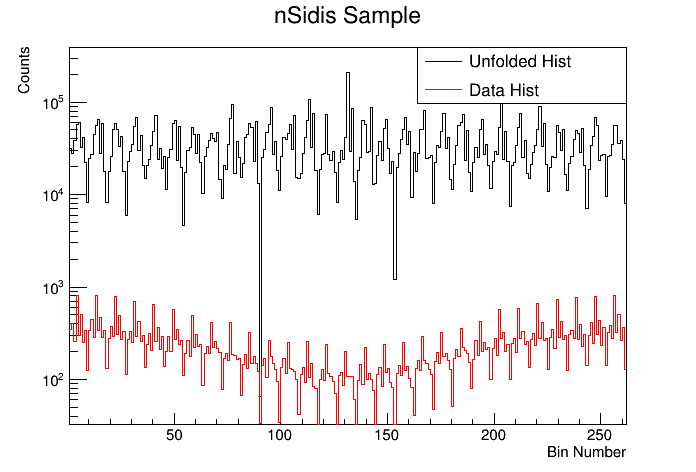

In [47]:

canvas = ROOT.TCanvas()

# Draw unfolded_hist and set properties
unfolded_hist.Draw("hist")
unfolded_hist.SetLineColor(1)

# Draw data_hist and set properties
data_hist.Draw("hist same")
data_hist.SetLineColor(2)

# Add axes labels
unfolded_hist.GetXaxis().SetTitle("Bin Number")
unfolded_hist.GetYaxis().SetTitle("Counts")

unfolded_hist.SetTitle("nSidis Sample")
# Create a TLegend
legend = ROOT.TLegend(0.6, 0.78, 0.9, 0.9)  # Adjust the coordinates as per your requirement
legend.AddEntry(unfolded_hist, "Unfolded Hist", "l")  # Add entry for unfolded_hist
legend.AddEntry(data_hist, "Data Hist", "l")  # Add entry for data_hist
legend.Draw()
canvas.SetLogy(1)
canvas.Draw()

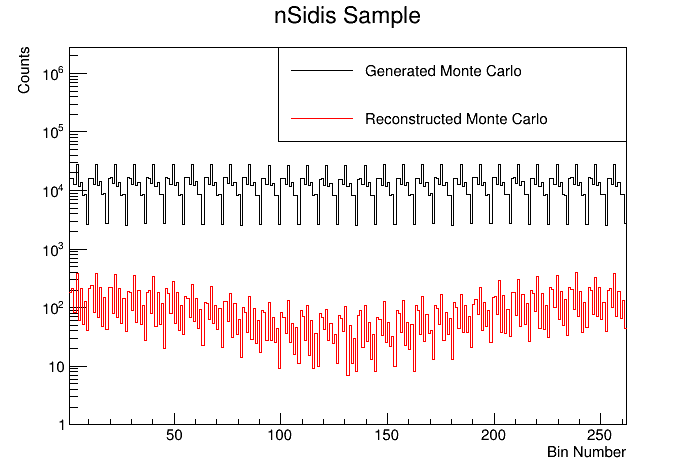

In [45]:

canvas = ROOT.TCanvas()

# Draw unfolded_hist and set properties
true_hist.Draw("hist")
true_hist.SetLineColor(1)

# Draw data_hist and set properties
reco_hist.Draw("hist same")
reco_hist.SetLineColor(2)

# Add axes labels
true_hist.GetXaxis().SetTitle("Bin Number")
true_hist.GetYaxis().SetTitle("Counts")
true_hist.GetYaxis().SetRangeUser(1,10*true_hist.GetMaximum())
true_hist.SetTitle("nSidis Sample")
# Create a TLegend
legend = ROOT.TLegend(0.4, 0.7, 0.9, 0.9)  # Adjust the coordinates as per your requirement
legend.AddEntry(true_hist, "Generated Monte Carlo", "l")  # Add entry for unfolded_hist
legend.AddEntry(reco_hist, "Reconstructed Monte Carlo", "l")  # Add entry for data_hist
legend.Draw()
canvas.SetLogy(1)
canvas.Draw()

In [41]:
true_hist.GetMaximum()

10.0

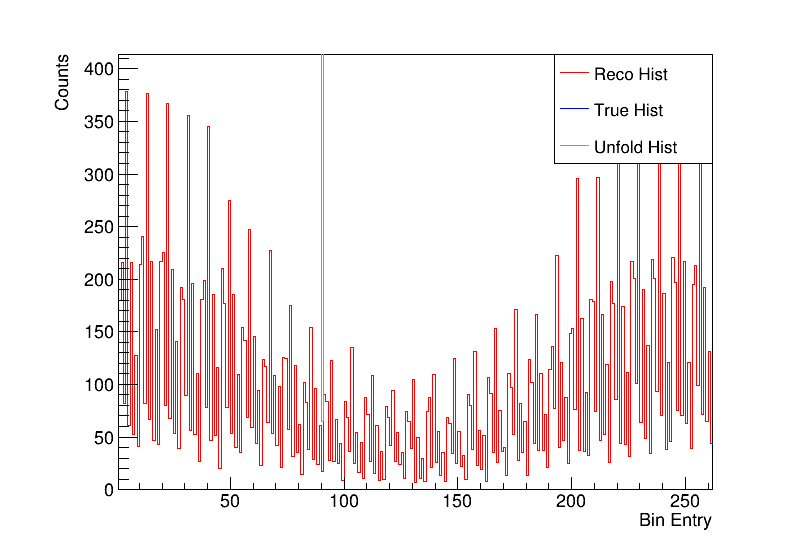

In [48]:
canvas = Unfold.plot_unfolded(reco_hist,true_hist,unfolded_hist)
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


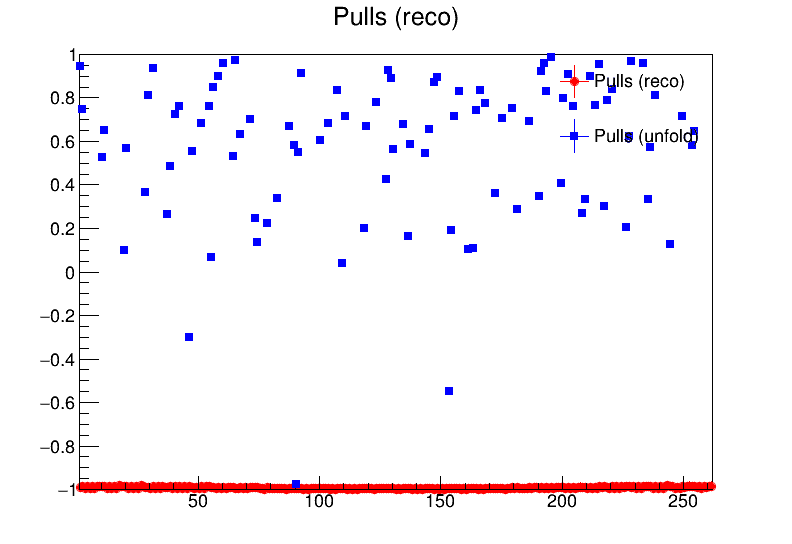

In [49]:
canvas=Unfold.plot_pulls(reco_hist,true_hist,unfolded_hist)
canvas.Draw()

In [50]:
unfolded_hist.Scale(1/unfolded_hist.Integral())
reco_hist.Scale(1/reco_hist.Integral());
true_hist.Scale(1/true_hist.Integral()); true_hist.SetLineColor(2)
data_hist.Scale(1/data_hist.Integral()); data_hist.SetLineColor(3)

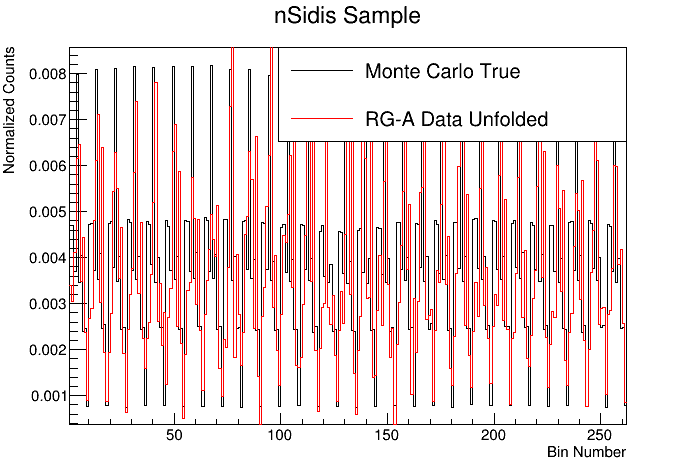

In [51]:
c = ROOT.TCanvas()

# Draw unfolded_hist and set properties

unfolded_hist.SetLineColor(2)

# Draw true_hist and set properties
true_hist.Draw("hist")
unfolded_hist.Draw("hist same")
true_hist.SetLineColor(1)

# Add axes labels
true_hist.GetXaxis().SetTitle("Bin Number")
true_hist.GetYaxis().SetTitle("Normalized Counts")

# Create a TLegend
legend = ROOT.TLegend(0.4, 0.7, 0.9, 0.9)  # Adjust the coordinates as per your requirement
legend.AddEntry(true_hist, "Monte Carlo True", "l")  # Add entry for true_hist
legend.AddEntry(unfolded_hist, "RG-A Data Unfolded", "l")  # Add entry for unfolded_hist

legend.Draw()

c.Draw()

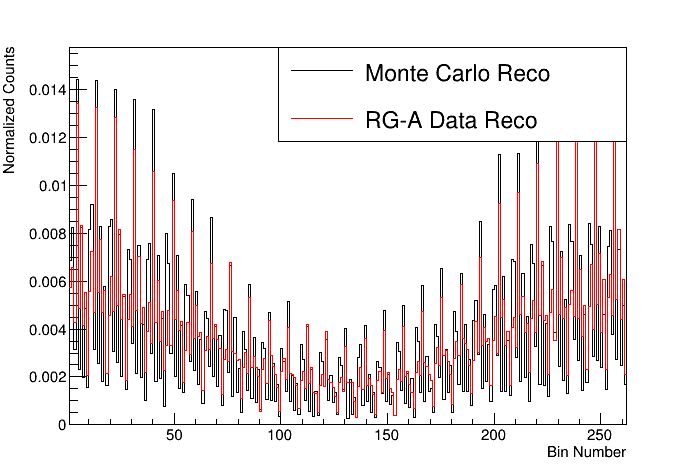

In [52]:

c = ROOT.TCanvas()

# Draw reco_hist and set properties
reco_hist.Draw("hist")
reco_hist.SetLineColor(1)

# Draw data_hist and set properties
data_hist.Draw("hist same")
data_hist.SetLineColor(2)

# Add axes labels
reco_hist.GetXaxis().SetTitle("Bin Number")
reco_hist.GetYaxis().SetTitle("Normalized Counts")

# Create a TLegend
legend = ROOT.TLegend(0.4, 0.7, 0.9, 0.9)  # Adjust the coordinates as per your requirement
legend.AddEntry(reco_hist, "Monte Carlo Reco", "l")  # Add entry for reco_hist
legend.AddEntry(data_hist, "RG-A Data Reco", "l")  # Add entry for data_hist
legend.Draw()

c.Draw()